# 选择配色方案

# 目录
+ 使用color_palette()和set_palette()建立配色方案
    + color_palette()可以接受的颜色参数形式
    + sns.choose_colorbrewer_palette()能够以互动的方式测试、修改不同的参数
    + Qualitative color palettes
        + 使用循环颜色系统
        + 使用Color Brewer调色板
        + 手动指定循环颜色系统
        + 使用来自xkcd color survey的颜色名字
    + Sequential color palettes
        + Sequential palettes中的cubehelix_palette()函数
        + sns.choose_cubehelix__palette()能够以互动的方式测试、修改不同的参数
        + Sequential palettes中的light_palette()函数和dark_palette()函数
        + sns.choose_light_palette()能够以互动的方式测试、修改不同的参数  
        + sns.choose_dark_palette()能够以互动的方式测试、修改不同的参数  
    + Diverging color palettes
        + Diverging palettes中的diverging_palette()函数
        + sns.choose_diverging_palette()能够以互动的方式测试、修改不同的参数
        
        
+ 使用set_palette()函数改变配色方案的默认设置


+ 临时设置图表配色方案

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))
%matplotlib inline

## 使用color_palette()和set_palette()建立配色方案

### color_palette()可以接受的颜色参数形式
+ HTML十六进制字符串（hex color codes）
    + color = '#eeefff'       

+ 合法的HTML颜色名字（HTML color names）
    + color = 'red'/'chartreuse'      

+ 归一化到[0, 1]的RGB元组（RGB tuples）
    + color = (0.3, 0.3, 0.4)

### sns.choose_colorbrewer_palette()能够以互动的方式测试、修改不同的参数
只能用于Jupyter Notebook

sns.choose_colorbrewer_palette(data_type, as_cmap=False)  
+ data_type : {‘sequential’, ‘diverging’, ‘qualitative’}  
This describes the kind of data you want to visualize. Note that you can pass substrings（e.g. ‘q’ for ‘qualitative）.
+ as_cmap : bool  
If True, the return value is a matplotlib colormap rather than a list of discrete colors.

In [2]:
from ipywidgets import interact
sns.choose_colorbrewer_palette('sequential', as_cmap=False)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

### Qualitative color palettes

当需要区分离散的数据集，且数据集之间没有内在的顺序，最好使用qualitative (or categorical) palettes

In [3]:
# 导入Seaborn的同时，会引入默认的颜色循环，由6种颜色构成
sns.color_palette() # 返回当前默认颜色循环

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

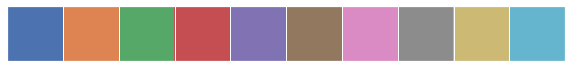

In [4]:
# 显示当前默认颜色循环
current_palette = sns.color_palette()
sns.palplot(current_palette) # sns.palplot：plot the values in a color palette as a horizontal array

在默认颜色主题的基础上，有6个变种：deep、muted、pastel、bright、dark、colorblind

#### 使用循环颜色系统
当需要区分的数据集超过颜色循环中的6种颜色时，最简单的方法是使用循环颜色系统

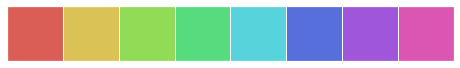

In [5]:
# 最为常用的方法是使用'hls'循环颜色系统
sns.palplot(sns.color_palette("hls", 8))

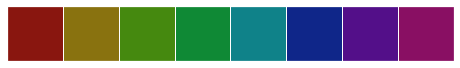

In [6]:
# 可以通过sns.hls_palette函数控制'hls'循环颜色系统的亮度和饱和度
sns.palplot(sns.hls_palette(8, l=.3, s=.8)) # l是亮度（lightness），s是饱和度（saturation）

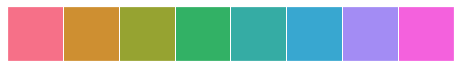

In [7]:
# 'husl'循环颜色系统，在亮度和饱和度上分别更加平均
sns.palplot(sns.color_palette("husl", 8))

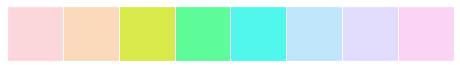

In [8]:
# 可以通过sns.husl_palette函数控制'husl'循环颜色系统的亮度和饱和度
sns.palplot(sns.husl_palette(8, l=.9, s=.9)) # l是亮度（lightness），s是饱和度（saturation）

#### 使用Color Brewer调色板

来自[Color Brewer](http://colorbrewer2.org/)的颜色循环系统
+ 缺点  
在某些情况下颜色会循环重复
+ 优点  
某些颜色循环系统对色盲比较友好（尤其是红绿色盲）

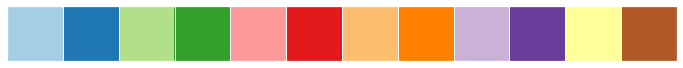

In [9]:
sns.palplot(sns.color_palette("Paired"))

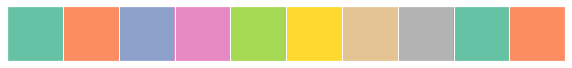

In [10]:
sns.palplot(sns.color_palette("Set2", 10))

#### 手动指定循环颜色系统

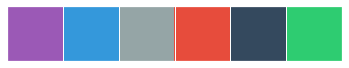

In [11]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

#### 使用来自xkcd color survey的颜色名字
[954 named colors](http://xkcd.com/color/rgb/)

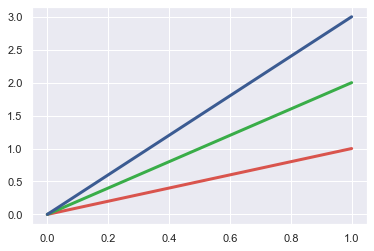

In [12]:
# 使用sns.xkcd_rgb设置颜色名字
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

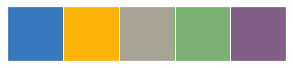

In [13]:
# 使用sns.xkcd_palette传入颜色名字列表
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

### Sequential color palettes

当数据集的范围从相对低值（不感兴趣）到相对高值（很感兴趣），最好使用sequential color palettes  

常用于kdeplot或corrplot等函数  

The Color Brewer library中有大量的sequential color palettes，以占主导地位的颜色命名（如Blues）

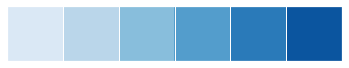

In [14]:
sns.palplot(sns.color_palette("Blues"))

添加后缀_r，倒置sequential color palettes的顺序

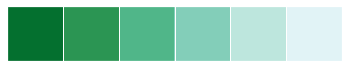

In [15]:
sns.palplot(sns.color_palette("BuGn_r"))

添加后缀_d，使sequential color palettes颜色变深

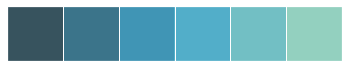

In [16]:
sns.palplot(sns.color_palette("GnBu_d"))

#### Sequential palettes中的cubehelix_palette()函数
cubehelix调色板系统的亮度是线性变化的，优点在于打印后也能区分不同颜色，且对色盲友好

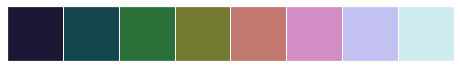

In [17]:
# 通过cubehelix参数调用
sns.palplot(sns.color_palette("cubehelix", 8)) 

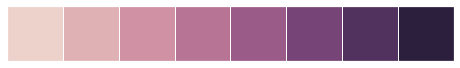

In [18]:
# 通过sns.cubehelix_palette()函数调用，与通过cubehelix参数调用的结果有所区别（色域的宽度变小、明暗变化倒置）
sns.palplot(sns.cubehelix_palette(8)) 

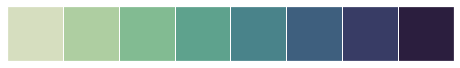

In [19]:
# start参数（取值0到3）和rot参数（number of rotations，任意值，取值-1到1）
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

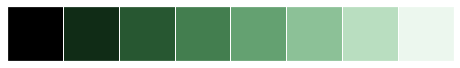

In [20]:
# dark、light参数（控制endpoints的暗度和亮度）、reverse参数（倒置cubehelix_palette）
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

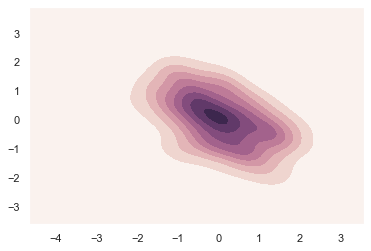

In [21]:
# 默认返回颜色列表，设置as_cmap=True返回colormap对象，可以用于某些Seaborn或matplotlib函数
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

#### sns.choose_cubehelix__palette()能够以互动的方式测试、修改不同的参数  
只能用于Jupyter Notebook

sns.choose_cubehelix_palette(as_cmap=False)
+ as_cmap : bool  
If True, the return value is a matplotlib colormap rather than a list of discrete colors.

In [22]:
sns.choose_cubehelix_palette(as_cmap=False)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.35317781405034754],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

#### Sequential palettes中的light_palette()函数和dark_palette()函数
以某个颜色为种子，从明向暗或从暗向明渐变，产生sequential palettes

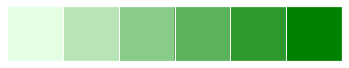

In [23]:
sns.palplot(sns.light_palette("green"))

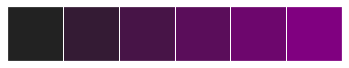

In [24]:
sns.palplot(sns.dark_palette("purple"))

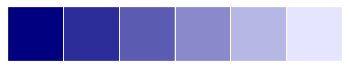

In [25]:
# 倒置调色板的顺序
sns.palplot(sns.light_palette("navy", reverse=True))

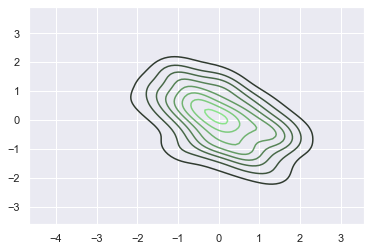

In [26]:
# 产生colormap对象，而非颜色列表
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

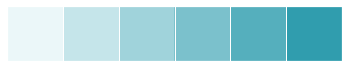

In [27]:
# provide tuples in ``hls`` or ``husl`` space along with the default ``rgb``
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

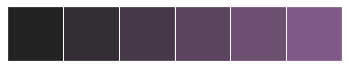

In [28]:
# seed the palette with any valid ``xkcd`` color
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

#### sns.choose_light_palette()能够以互动的方式测试、修改不同的参数
只能用于Jupyter Notebook

sns.choose_light_palette(input='husl', as_cmap=False)
+ input : {‘husl’, ‘hls’, ‘rgb’}  
Color space for defining the seed value. Note that the default is different than the default input for light_palette().
+ as_cmap : bool  
If True, the return value is a matplotlib colormap rather than a list of discrete colors.

In [29]:
sns.choose_light_palette(input='husl', as_cmap=False)

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[(0.940544578122485, 0.9594554218775149, 0.9567958587748776),
 (0.8736325434754942, 0.9074275793822586, 0.9026747491165003),
 (0.8067205088285034, 0.8553997368870022, 0.848553639458123),
 (0.7374187586584059, 0.8015137571597725, 0.7924996330262322),
 (0.6705067240114151, 0.7494859146645162, 0.7383785233678548),
 (0.6012049738413174, 0.6955999349372863, 0.6823245169359641),
 (0.5342929391943267, 0.6435720924420301, 0.6282034072775868),
 (0.4649911890242291, 0.5896861127148003, 0.572149400845696),
 (0.3980791543772383, 0.537658270219544, 0.5180282911873186),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

#### sns.choose_dark_palette()能够以互动的方式测试、修改不同的参数  
只能用于Jupyter Notebook

sns.choose_dark_palette(input='husl', as_cmap=False)
+ input : {‘husl’, ‘hls’, ‘rgb’}  
Color space for defining the seed value. Note that the default is different than the default input for dark_palette().
+ as_cmap : bool  
If True, the return value is a matplotlib colormap rather than a list of discrete colors.

In [30]:
sns.choose_dark_palette(input='husl', as_cmap=False)

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[(0.13333333333333333, 0.13333333333333333, 0.13333333333333333),
 (0.15505625889848468, 0.17201693585469302, 0.16963163823324323),
 (0.17677918446363602, 0.21070053837605274, 0.2059299431331531),
 (0.19927792879897135, 0.2507656981303181, 0.24352461606520265),
 (0.2210008543641227, 0.28944930065167784, 0.2798229209651125),
 (0.24349959869945803, 0.32951446040594323, 0.31741759389716206),
 (0.26522252426460935, 0.3681980629273029, 0.353715898797072),
 (0.28772126859994474, 0.40826322268156834, 0.39131057172912154),
 (0.30944419416509605, 0.44694682520292794, 0.42760887662903135),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

### Diverging color palettes
当数据集的低值和高值都很重要，且数据集中有明确定义的中点时，最好使用diverging color palettes  

例如，绘制温度相对于基准时间点的变化图，最好使用diverging colormap来同时显示温度相对于基准值的上升和下降  

两端的颜色应该具有相似的亮度和饱和度，中间点的颜色不应该喧宾夺主

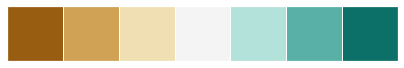

In [31]:
sns.palplot(sns.color_palette("BrBG", 7))

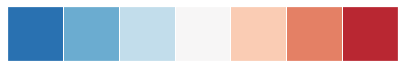

In [32]:
sns.palplot(sns.color_palette("RdBu_r", 7))

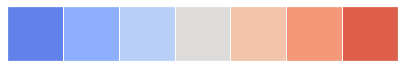

In [33]:
# coolwarm调色板也是很好的选择，缺点在于中间的颜色和两端的颜色对比较少
sns.palplot(sns.color_palette("coolwarm", 7))

#### Diverging palettes中的diverging_palette()函数
diverging_palette()函数使用'husl'颜色系统，需要在函数中设置两个hue参数，也可以选择设置两端颜色的亮度和饱和度

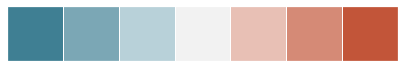

In [34]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

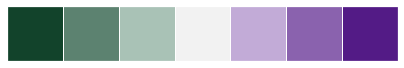

In [35]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

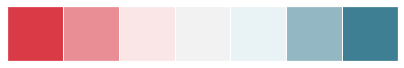

In [36]:
# sep参数controls the width of the separation between the two ramps in the middle region of the palette
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

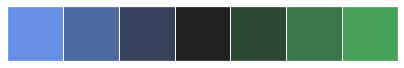

In [37]:
# 可以将中间点的颜色设置成暗色而非亮色
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

#### sns.choose_diverging_palette()能够以互动的方式测试、修改不同的参数
只能用于Jupyter Notebook

sns.choose_diverging_palette(as_cmap=False)
+ as_cmap : bool
If True, the return value is a matplotlib colormap rather than a list of discrete colors.

In [38]:
sns.choose_diverging_palette(as_cmap=False)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43026136111758173, 0.6200066482697917, 0.6787801878373952),
 (0.6085255804707219, 0.7412795877319109, 0.7824000973141302),
 (0.786789799823862, 0.86255252719403, 0.8860200067908652),
 (0.95, 0.95, 0.95),
 (0.954577257933482, 0.7665309859226215, 0.7803256889894359),
 (0.9197182699854205, 0.5873587656270927, 0.6117400023569117),
 (0.884859282037359, 0.40818654533156384, 0.4431543157243877),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

```
.. _palette_contexts:

Changing default palettes with :func:`set_palette`
--------------------------------------------------

The :func:`color_palette` function has a companion called :func:`set_palette`. The relationship between them is similar to the pairs covered in the :ref:`aesthetics tutorial <aesthetics_tutorial>`. :func:`set_palette` accepts the same arguments as :func:`color_palette`, but it changes the default matplotlib parameters so that the palette is used for all plots.
```

## 使用set_palette()函数改变配色方案的默认设置
color_palette()与set_palette()的关系，类似于axes_style()和set_style()的关系  

set_palette()的参数与color_palette()相同  

区别在于，set_palette()会改变配色方案的默认设置，从而应用于之后所有的图表

In [39]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

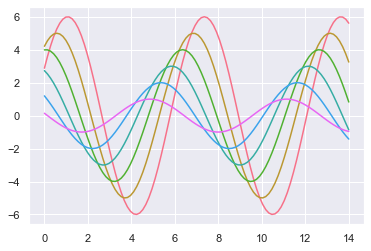

In [40]:
sns.set_palette("husl")
sinplot()

## 临时设置图表配色方案
在with语句里使用color_palette()函数来临时设置图表配色方案

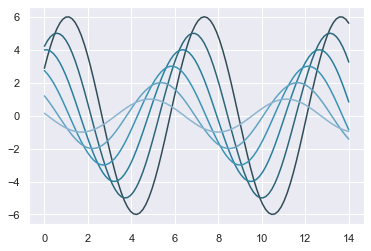

In [41]:
with sns.color_palette("PuBuGn_d"):
    sinplot()